por: Matheus Araujo
## Resumo da aula:

* (80%) Introdução a Classificadores Lineares: Passo a Passo
* (20%) Utilizando Classificador linear para iris setosa

In [0]:
from numpy.random import normal
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np


In [3]:
#Criando bolas azuis
bolas_azuis = {}
azul_peso_media = 50
azul_raio_media = 150
azul_peso_std = 10
azul_raio_std = 15

#normal(media, desvio, tamanho_amostra) : Retire amostras aleatórias de uma distribuição gaussiana

bolas_azuis["peso"] = normal(azul_peso_media, azul_peso_std, 100)
bolas_azuis["raio"] = normal(azul_raio_media, azul_raio_std , 100)
bolas_azuis["classe"] = "azul"

bolas_azuis_df = pd.DataFrame(bolas_azuis) 

#Criando bolas vermelhas
bolas_vermelhas = {}
vermelho_peso_media = 40
vermelho_raio_media = 100
vermelho_peso_std = 5
vermelho_raio_std = 30

bolas_vermelhas["peso"] = normal(vermelho_peso_media, vermelho_peso_std, 100)
bolas_vermelhas["raio"] = normal(vermelho_raio_media, vermelho_raio_std, 100)
bolas_vermelhas["classe"] = "vermelho"

bolas_vermelhas_df = pd.DataFrame(bolas_vermelhas)

print(bolas_vermelhas_df.head())
print()
print(bolas_azuis_df.head())

        peso        raio    classe
0  40.770677  137.769788  vermelho
1  36.903771   90.928832  vermelho
2  41.323629   46.695747  vermelho
3  31.247606  119.608592  vermelho
4  44.727547   72.271559  vermelho

        peso        raio classe
0  77.087930  148.503163   azul
1  45.858464  164.122145   azul
2  43.460175  129.895784   azul
3  45.587679  159.203634   azul
4  47.256815  120.303345   azul


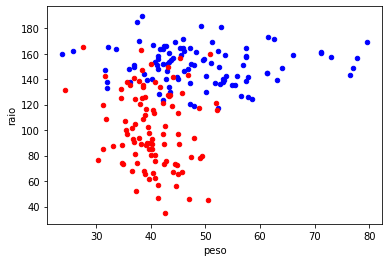

In [5]:
ax = bolas_azuis_df.plot.scatter("peso", "raio", c="b")
ax = bolas_vermelhas_df.plot.scatter("peso", "raio",ax=ax, c="r") #ax=ax para plotar no mesmo eixo

In [7]:
# Colocando as bolas dentro do mesmo caixa
caixa_original_df = pd.concat([bolas_azuis_df, bolas_vermelhas_df])

# Certifica que cada bola tem um index unico
mapa_cor_classe = {
    "vermelho" : 1,
    "azul" : 0
}

# o parâmetro drop=True evita que o índice antigo seja adicionado como uma coluna
caixa_original_df = caixa_original_df.reset_index(drop=True)

caixa_original_df["classe"] = caixa_original_df["classe"].apply(lambda classe: mapa_cor_classe[classe])
print("Numero de bolas: {}, Numero de Colunas: {}".format(caixa_original_df.shape[0], caixa_original_df.shape[1]))

Numero de bolas: 200, Numero de Colunas: 3


In [8]:
#Chacoalhando o caixa
caixa_original_df = caixa_original_df.sample(frac=1)
caixa_original_df.head()

,peso,raio,classe
153,52.064807,115.630045,1
109,36.772193,93.043225,1
105,47.822409,93.840555,1
162,45.774384,67.363531,1
139,37.272745,52.274281,1


In [9]:
#Pegando uma amostra de 40% da caixa e plotando

amostra_df = caixa_original_df.sample(n=80) # Pegando amostra de 80 bolas
caixa_df = caixa_original_df.drop(amostra_df.index) # Removendo bolas da caixa

print("Bolas na caixa: {}, Bolas na amostra: {}".format(caixa_df.shape[0], amostra_df.shape[0]))

Bolas na caixa: 120, Bolas na amostra: 80


# Voce conseguiria adivinhar qual é classe de cada bola?

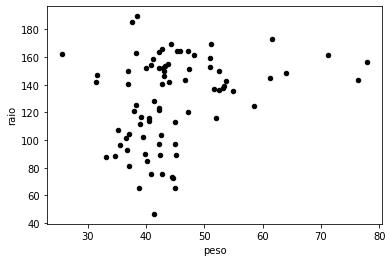

In [10]:
amostra_df.plot.scatter("peso","raio", c="k") #parâmetro c = cor de cada ponto. Opcional.

             peso                   raio           
             mean        std        mean        std
classe                                             
0       48.736686  10.926033  151.852751  15.480359
1       40.679067   4.365465  105.938422  27.919347


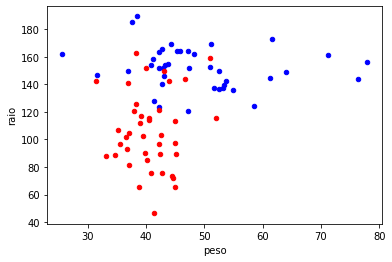

In [11]:
# Imprimindo media e desvio padrão de cada feature (coluna) na amostra
print(amostra_df.groupby("classe").agg(["mean", "std"]))

# Separando bolas azuis e bolas vermelhas da amostra
bolas_azuis_amostra = amostra_df[amostra_df["classe"] == 0]
bolas_vermelhas_amostra = amostra_df[amostra_df["classe"] == 1]

# Mostrando a cor da amostra
ax = bolas_azuis_amostra.plot.scatter("peso", "raio", c="b")
bolas_vermelhas_amostra.plot.scatter("peso", "raio", ax=ax, c="r")


In [14]:
#É comum usar 42 (ou qualquer inteiro) como random_state (para mais informações consulte
#o guia do mochileiro das galáxias.): para propagar a amostra. O sample será sempre o mesmo.

#Definindo classificador
clf = LogisticRegression()

# Definindo vetores de features
X = amostra_df[["peso", "raio"]].values
print(X[:2])

# Definindo vetor da variavel alvo
Y = amostra_df["classe"].values
print(Y[:2])

# Treinando o classificador com os dados da amostra
clf.fit(X,Y)

[[ 42.22374998 121.68595268]
 [ 46.77512303 143.54129668]]
[1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Função auxiliar para plotar o hiperplano do classificador linear
def plot_hiperplano(clf, ax=None):
    global amostra_df #global para definir uma variável de escopo global

    #O coeficiente de variação é usado para analisar a dispersão em termos relativos a média
    w = clf.coef_[0]

    # Criando hiperplano (linha)
    m = -w[0] / w[1]
    
    #linspace = cria uma seqüência de números uniformemente espaçados entre os limites dados.
    xx = np.linspace(amostra_df["peso"].min(), amostra_df["peso"].max())
    
    # Formula da reta: a*x + by + c = 0
    # Logo: y = -ax/b -c/b    
    yy = m * xx - (clf.intercept_[0]) / w[1]
    # Plotando hiperplano
    if ax:
        ax.plot(xx, yy)
    else:        
        plt.plot(xx, yy)
        plt.xlim(amostra_df["peso"].min(), amostra_df["peso"].max())
        plt.ylim(amostra_df["raio"].min(), amostra_df["raio"].max())
        
        


[ 0.01605649 -0.03060069]


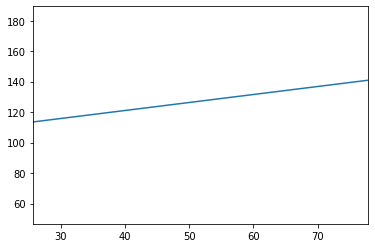

In [17]:
# Plotando o Classificador linear
plot_hiperplano(clf)

[ 0.01605649 -0.03060069]


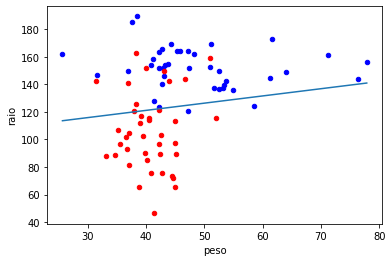

In [18]:
# Plotando o classificador linear junto com nossa amostra
ax = amostra_df[amostra_df["classe"] == 0].plot.scatter("peso", "raio", c="b")
amostra_df[amostra_df["classe"] == 1].plot.scatter("peso", "raio", ax=ax, c="r")
plot_hiperplano(clf,ax)

## Qual é a performance do nosso classificador na amostra?

In [19]:
acuracia_meadia_amostra = clf.score(X,Y)
print("Acuracia Media", acuracia_meadia_amostra)

Acuracia Media 0.85


# Vamos retirar mais bolas

In [20]:
# Pegando primeira bola da caixa e utilizando o classificador
bola_x = caixa_df.iloc[0] # Escolhendo bola
caixa_df = caixa_df.drop(bola_x.name, errors="ignore") # Removendo bola
print("Bolas na Caixa: {}".format(caixa_df.shape[0]))
print("Bola Removida:")
bola_x

Bolas na Caixa: 119
Bola Removida:


peso      47.822409
raio      93.840555
classe     1.000000
Name: 105, dtype: float64

In [21]:
classe_prevista = clf.predict(bola_x[["peso", "raio"]].values.reshape(1,-1))[0]
print("Classe Prevista: {}".format(classe_prevista))

Classe Prevista: 1


In [22]:
mapa_class_cor = {
    1 : "vermelho",
    0 : "azul"
}
print("Classe Prevista: {}".format(mapa_class_cor[classe_prevista]))

Classe Prevista: vermelho


# Classificando o resto da caixa

In [23]:
print("Bolas na caixa: {}".format(caixa_df.shape[0]))

Bolas na caixa: 119


In [24]:
bolas_previsoes = clf.predict(caixa_df[["peso", "raio"]].values)
bolas_previsoes_cores = list(map(lambda classe: mapa_class_cor[classe], bolas_previsoes))
print("Primeiras 10 bolas na caixa são: {}".format(bolas_previsoes_cores[:10]))

Primeiras 10 bolas na caixa são: ['vermelho', 'vermelho', 'azul', 'azul', 'azul', 'azul', 'azul', 'vermelho', 'vermelho', 'azul']


In [25]:
caixa_df["previsao"] = bolas_previsoes
caixa_df.head()

,peso,raio,classe,previsao
162,45.774384,67.363531,1,1
139,37.272745,52.274281,1,1
78,32.219642,165.045102,0,0
51,46.047250,161.882821,0,0
188,41.705827,133.792488,1,0


## Qual é a performace do nosso classificador para o resto da caixa?

**!Importante:** Lembre-se que o classficador foi treinado com as amostras. As bolas dentro da caixa nunca foram vistas antes.

In [26]:
X_caixa = caixa_df[["peso", "raio"]].values 
Y_caixa = caixa_df[["classe"]].values
acuracia_media_caixa = clf.score(X_caixa, Y_caixa)
print("Acuracia média na caixa: {:.2f}%".format(acuracia_media_caixa*100))

Acuracia média na caixa: 79.83%


## Desmitificando calculo da acuracia média

In [27]:
total = caixa_df.shape[0]
acertou = 0
for index, bola in caixa_df.iterrows():
    if bola["classe"] == bola["previsao"]:
        acertou += 1
print("Acertou: {}\nErrou: {}\nAcuracia na Caixa: {:.2f}%".format(acertou, total - acertou, (acertou/total) * 100))

Acertou: 95
Errou: 24
Acuracia na Caixa: 79.83%


Acuracia Amostra: 0.85, Acuracia Caixa: 0.7983193277310925 


Text(0.5, 1.0, 'Desempenho do Classificador de Bolas')

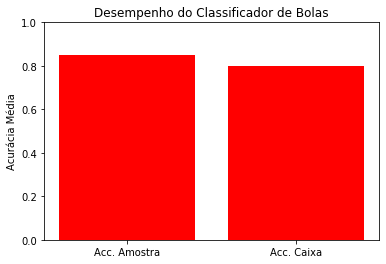

In [28]:
print("Acuracia Amostra: {}, Acuracia Caixa: {} ".format(acuracia_meadia_amostra, acuracia_media_caixa))

# Utilizando matplotlib para fazer um grafico de barras
acuracias_nomes = ['Acc. Amostra', 'Acc. Caixa']
y_pos = np.arange(len(acuracias_nomes))
acuracias = [acuracia_meadia_amostra, acuracia_media_caixa]
plt.bar(y_pos, acuracias, align='center', color="r")

# Colocando nomes no eixo
plt.xticks(y_pos, acuracias_nomes)
plt.ylim(0,1)
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Classificador de Bolas')